In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [2]:
train_images_path = "D:/my_files/NCET/shilpashree mam/mini project/Human Action Recognition/train"
test_images_path = "D:/my_files/NCET/shilpashree mam/mini project/Human Action Recognition/test"
train_csv_path = "D:/my_files/NCET/shilpashree mam/mini project/Human Action Recognition/Training_set.csv"
test_csv_path="D:/my_files/NCET/shilpashree mam/mini project/Human Action Recognition/Testing_set.csv"

In [3]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [4]:
print(train_df)

                                                filename               label
0      D:\my_files\NCET\shilpashree mam\mini project\...             sitting
1      D:\my_files\NCET\shilpashree mam\mini project\...        using_laptop
2      D:\my_files\NCET\shilpashree mam\mini project\...             hugging
3      D:\my_files\NCET\shilpashree mam\mini project\...            sleeping
4      D:\my_files\NCET\shilpashree mam\mini project\...        using_laptop
...                                                  ...                 ...
12595  D:\my_files\NCET\shilpashree mam\mini project\...             sitting
12596  D:\my_files\NCET\shilpashree mam\mini project\...            clapping
12597  D:\my_files\NCET\shilpashree mam\mini project\...             sitting
12598  D:\my_files\NCET\shilpashree mam\mini project\...             dancing
12599  D:\my_files\NCET\shilpashree mam\mini project\...  listening_to_music

[12600 rows x 2 columns]


In [5]:
print(test_df)

                                               filename
0     D:\my_files\NCET\shilpashree mam\mini project\...
1     D:\my_files\NCET\shilpashree mam\mini project\...
2     D:\my_files\NCET\shilpashree mam\mini project\...
3     D:\my_files\NCET\shilpashree mam\mini project\...
4     D:\my_files\NCET\shilpashree mam\mini project\...
...                                                 ...
5395  D:\my_files\NCET\shilpashree mam\mini project\...
5396  D:\my_files\NCET\shilpashree mam\mini project\...
5397  D:\my_files\NCET\shilpashree mam\mini project\...
5398  D:\my_files\NCET\shilpashree mam\mini project\...
5399  D:\my_files\NCET\shilpashree mam\mini project\...

[5400 rows x 1 columns]


In [6]:
activities = train_df['label'].unique().tolist()
print("Activities:", activities)

Activities: ['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking', 'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating', 'fighting', 'listening_to_music', 'running', 'texting']


In [7]:

# Define performance metrics
performance_metrics = ["accuracy", "precision", "recall", "f1-score"]

In [8]:
# Map activity labels to integer indices
label_to_index = {label: index for index, label in enumerate(activities)}
print(label_to_index)

{'sitting': 0, 'using_laptop': 1, 'hugging': 2, 'sleeping': 3, 'drinking': 4, 'clapping': 5, 'dancing': 6, 'cycling': 7, 'calling': 8, 'laughing': 9, 'eating': 10, 'fighting': 11, 'listening_to_music': 12, 'running': 13, 'texting': 14}


In [9]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    image = cv2.resize(image, (64, 64))
    image = image / 255.0
    return image

In [10]:
def load_dataset(df, images_path, label_to_index=None):
    images = []
    labels = []
    for _, row in df.iterrows():
        image_path = os.path.join(images_path, row['filename'])
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at path: {image_path}")
            continue
        try:
            image = load_and_preprocess_image(image_path)
            images.append(image)
            if label_to_index is not None:
                label = label_to_index[row['label']]
                labels.append(label)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
    
    if label_to_index is not None:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

In [11]:
#Load and preprocess datasets
X_train, y_train = load_dataset(train_df, train_images_path, label_to_index)
X_test = load_dataset(test_df, test_images_path)

# Ensure labels are integers for training
y_train = np.array(y_train, dtype=int)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=len(activities))

In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (12600, 64, 64, 3)
y_train shape: (12600, 15)
X_test shape: (5400, 64, 64, 3)


In [13]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flattening the network and adding fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(activities), activation='softmax'))

C:\Users\anany\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Explanation of the Architecture
Convolutional Layers: Each convolutional block consists of a convolutional layer followed by batch normalization, max pooling, and dropout for regularization.
Batch Normalization: Added after each convolutional layer to normalize the activations and help with training stability.
Dropout: Included after each pooling layer to reduce overfitting.
Fully Connected Layers: Two dense layers are added after flattening the network, with batch normalization and dropout.
Output Layer: A dense layer with softmax activation for classification.
This deeper CNN architecture should provide better feature extraction and classification performance. Adjust the number of epochs, batch size, learning rate, and other hyperparameters as needed for your specific dataset and requirements.

In [14]:
# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [15]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.1017 - loss: 3.5576 - val_accuracy: 0.0738 - val_loss: 4.7066
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.1638 - loss: 2.7136 - val_accuracy: 0.1750 - val_loss: 2.4956
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 44s 138ms/step - accuracy: 0.2175 - loss: 2.4564 - val_accuracy: 0.2230 - val_loss: 2.3300
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.2385 - loss: 2.3166 - val_accuracy: 0.2599 - val_loss: 2.3228
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.2745 - loss: 2.2104 - val_accuracy: 0.2528 - val_loss: 2.3776
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.3073 - loss: 2.1259 - val_accuracy: 0.3294 - val_loss: 2.0774
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.3246 - loss: 2.0617 - val_accuracy: 0.2413 - val_loss: 2.4149
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.3555 - loss: 1

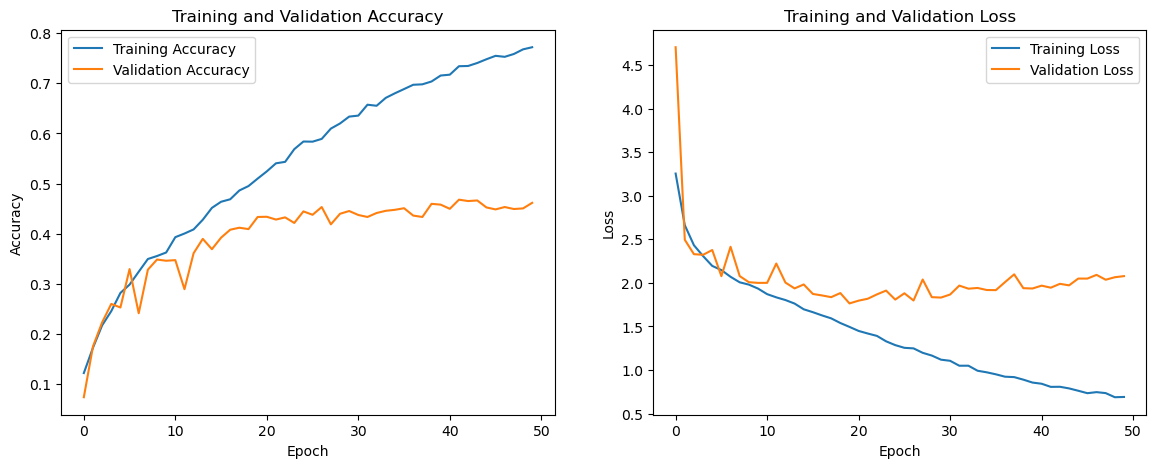

In [18]:
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(14, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)

In [17]:
# Predicting on the test dataset
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mapping predicted labels back to activity names
predicted_activities = [activities[label] for label in y_pred_labels]

print("Predicted activities for the test set:")
print(predicted_activities)

169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
Predicted activities for the test set:
['sleeping', 'texting', 'sleeping', 'eating', 'using_laptop', 'clapping', 'drinking', 'clapping', 'laughing', 'drinking', 'listening_to_music', 'laughing', 'dancing', 'sleeping', 'sitting', 'drinking', 'texting', 'sitting', 'sleeping', 'drinking', 'drinking', 'clapping', 'hugging', 'running', 'sitting', 'dancing', 'drinking', 'listening_to_music', 'sleeping', 'laughing', 'running', 'sitting', 'laughing', 'sleeping', 'hugging', 'sleeping', 'sitting', 'eating', 'texting', 'fighting', 'eating', 'calling', 'clapping', 'eating', 'hugging', 'eating', 'hugging', 'sitting', 'sitting', 'sleeping', 'sitting', 'cycling', 'listening_to_music', 'clapping', 'calling', 'sitting', 'dancing', 'laughing', 'listening_to_music', 'texting', 'using_laptop', 'hugging', 'clapping', 'texting', 'calling', 'sitting', 'using_laptop', 'laughing', 'hugging', 'fighting', 'laughing', 'dancing', 'calling', 'sleeping', 'sitting', 'dancing'

In [19]:
import time
import collections
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import threading
import tkinter as tk

In [33]:
stop_capture = False

def capture_and_predict():
    global stop_capture
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera

    buffer_size = 90  # 5 seconds buffer assuming 30 FPS
    prediction_buffer = collections.deque(maxlen=buffer_size)
    start_time = time.time()
    output_text = ''
    activity_index = 0

    while True:
        if stop_capture:
            break

        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame
        frame_resized = cv2.resize(frame, (64, 64))
        frame_normalized = frame_resized / 255.0
        frame_expanded = np.expand_dims(frame_normalized, axis=0)

        # Model inference
        prediction = model.predict(frame_expanded)
        predicted_activity = activities[np.argmax(prediction)]
        prediction_buffer.append(predicted_activity)

        # Switch activity every 5 seconds
        if time.time() - start_time >= 3:
            # Get the most frequent activity in the buffer
            if prediction_buffer:
                most_common_activity = collections.Counter(prediction_buffer).most_common(1)[0][0]
                output_text = most_common_activity

            # Clear the buffer and reset the timer
            prediction_buffer.clear()
            start_time = time.time()

            # Switch to the next activity
            activity_index = (activity_index + 1) % len(activities)

        # Output visualization
        cv2.putText(frame, f'Activity: {output_text}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Activity Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def start_recognition():
    global stop_capture
    stop_capture = False
    recognition_thread = threading.Thread(target=capture_and_predict)
    recognition_thread.start()

def stop_recognition():
    global stop_capture
    stop_capture = True

# Tkinter GUI setup
root = tk.Tk()
root.title("Activity Recognition Control")

start_button = tk.Button(root, text="Start Recognition", command=start_recognition)
start_button.pack(pady=10)

stop_button = tk.Button(root, text="Stop Recognition", command=stop_recognition)
stop_button.pack(pady=10)

root.mainloop()

In [29]:
stop_capture = False

def capture_and_predict():
    global stop_capture
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera

    buffer_size = 150  # 5 seconds buffer assuming 30 FPS
    prediction_buffer = collections.deque(maxlen=buffer_size)
    start_time = time.time()
    output_text = ''
    activity_index = 0

    while True:
        if stop_capture:
            break

        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame
        frame_resized = cv2.resize(frame, (64, 64))
        frame_normalized = frame_resized / 255.0
        frame_expanded = np.expand_dims(frame_normalized, axis=0)

        # Model inference
        prediction = model.predict(frame_expanded)
        predicted_activity = activities[np.argmax(prediction)]
        prediction_buffer.append(predicted_activity)

        # Switch activity every 5 seconds
        if time.time() - start_time >= 3:
            # Get the most frequent activity in the buffer
            most_common_activity = collections.Counter(prediction_buffer).most_common(1)[0][0]
            output_text = most_common_activity

            # Clear the buffer and reset the timer
            prediction_buffer.clear()
            start_time = time.time()

            # Switch to the next activity
            activity_index = (activity_index + 1) % len(activities)

        # Output visualization
        cv2.putText(frame, f'Activity: {output_text}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Activity Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def start_recognition():
    global stop_capture
    stop_capture = False
    recognition_thread = threading.Thread(target=capture_and_predict)
    recognition_thread.start()

def stop_recognition():
    global stop_capture
    stop_capture = True

# Tkinter GUI setup
root = tk.Tk()
root.title("Activity Recognition Control")

start_button = tk.Button(root, text="Start Recognition", command=start_recognition)
start_button.pack(pady=10)

# Corrected line with closing parenthesis
stop_button = tk.Button(root, text="Stop Recognition", command=stop_recognition)
stop_button.pack(pady=10)

root.mainloop()